In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
df=pd.read_csv('../datasets/bank_data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

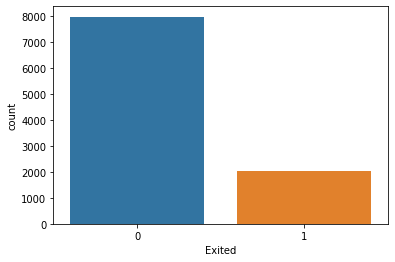

In [5]:
sns.countplot(x='Exited',data=df)

In [6]:
class_count_0,class_count_1=df.Exited.value_counts()

In [7]:
class_0=df[df.Exited==0]
class_1=df[df.Exited==1]

In [8]:
print("Class 0",class_0.shape)
print("Class 1",class_1.shape)

Class 0 (7963, 14)
Class 1 (2037, 14)


In [9]:
new_c1=class_1.sample(class_count_0,replace=True)
new_c1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
881,882,15571928,Fraser,679,France,Female,43,4,0.00,3,1,0,115136.51,1
5701,5702,15724154,Manna,625,Germany,Female,49,4,128504.76,1,1,0,126812.63,1
2917,2918,15621083,Douglas,698,France,Male,57,6,136325.48,2,1,1,72549.27,1
4719,4720,15583580,Chiawuotu,566,Germany,Female,35,1,123042.00,1,1,0,66245.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,3168,15583137,Pope,637,France,Female,48,7,130806.99,2,1,1,132005.85,1
8336,8337,15788480,Pagnotto,786,Germany,Female,33,0,122325.58,1,0,0,34712.34,1
5683,5684,15651664,Wilder,615,France,Female,61,1,104267.70,1,1,0,62845.64,1
7687,7688,15776494,Siciliano,754,France,Male,61,5,146622.35,1,1,1,41815.22,1


In [10]:
new_c1.Exited.value_counts()

1    7963
Name: Exited, dtype: int64

In [11]:
df=pd.concat([class_0, new_c1], ignore_index=True)

In [12]:
df.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

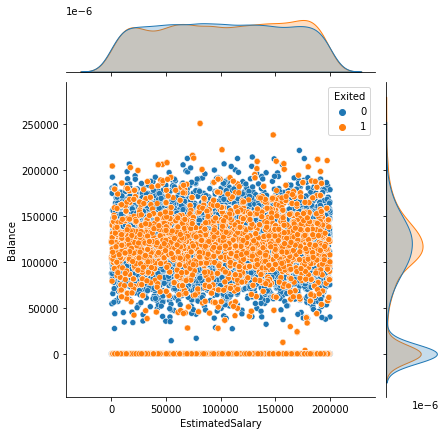

In [13]:
sns.jointplot(x='EstimatedSalary',y='Balance',data=df,hue='Exited')
plt.show()

In [14]:
X = df[['Balance','EstimatedSalary']]
y = df['Exited']

In [15]:
scaled = StandardScaler()
x = scaled.fit_transform(X)

In [16]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=.2,random_state=0)

In [18]:
m1=KNeighborsClassifier(n_jobs=-1)
m2=SVC(kernel='linear')

In [19]:
m1.fit(xtrain,ytrain)
m2.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
ypredKnn=m1.predict(X)
ypredsvc=m2.predict(X)

In [ ]:
print("KNN\n",confusion_matrix(y,ypredKnn))
print("SVC\n",confusion_matrix(y,ypredsvc))